# 2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

circle_data_1 = np.load("circle_data_1.npy")
circle_data_1 = np.transpose(circle_data_1)
x_sample = circle_data_1[:,0]
y_sample = circle_data_1[:,1]

In [2]:
from numpy.linalg import lstsq

N = x_sample.shape[0] # 25
# Ax = b
A = np.hstack([np.ones((N, 1)), -2 * circle_data_1])
b = -np.sum(circle_data_1**2, axis=1).reshape(-1, 1)
# print(circle_data_1)
# print(b)

z_ls, residuals, rank, s = lstsq(A, b, rcond=None)

y_opt = z_ls[0][0]
c_opt = z_ls[1:3,0]
R_opt = np.sqrt(pow(c_opt[0],2)+pow(c_opt[1],2) -y_opt)
print(f"y = {y_opt:.3f} c = ({c_opt[0]:.3f}, {c_opt[1]:.3f}), R = {R_opt:.3f}")


y = 1.159 c = (-1.062, 0.995), R = 0.979


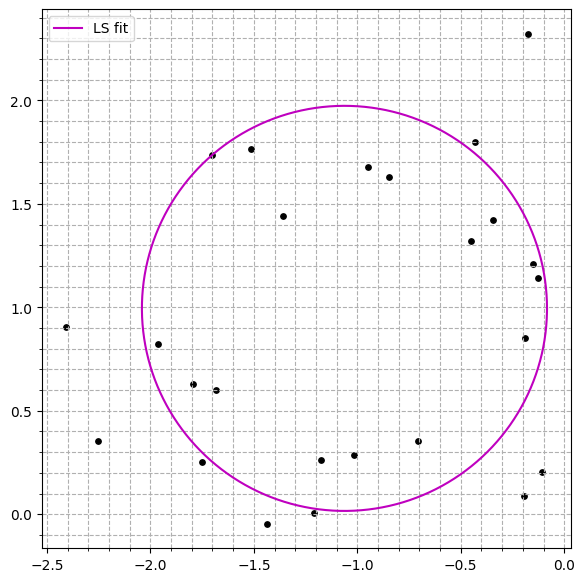

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(circle_data_1[:, 0], circle_data_1[:, 1], c='black', s=15, label=None)

theta = np.linspace(0, 2 * np.pi, 360)
x_fit_LS1 = c_opt[0] + R_opt * np.cos(theta)
y_fit_LS1 = c_opt[1] + R_opt * np.sin(theta)


ax.plot(x_fit_LS1, y_fit_LS1, c='m', label='LS fit')
ax.legend()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--')
ax.minorticks_on()

plt.show()

## Task 9

y = 2.111 c = (-0.446, 1.505), R = 0.593


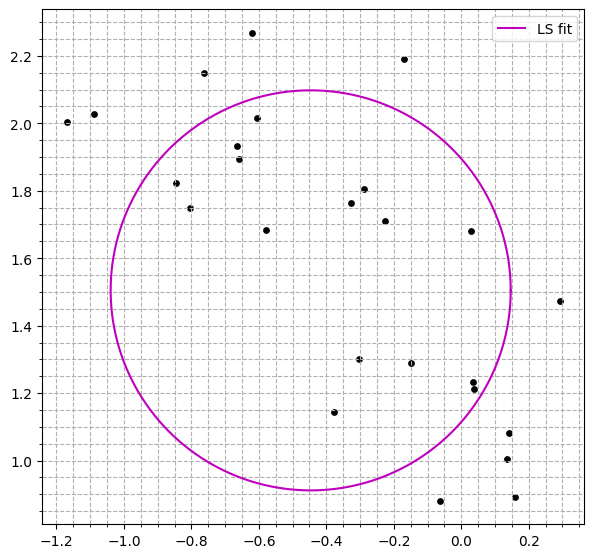

In [4]:
import numpy as np
import matplotlib.pyplot as plt

circle_data_2 = np.load("circle_data_2.npy")
circle_data_2 = np.transpose(circle_data_2)
x_sample = circle_data_2[:,0]
y_sample = circle_data_2[:,1]

from numpy.linalg import lstsq

N = x_sample.shape[0] # 25
# Ax = b
A = np.hstack([np.ones((N, 1)), -2 * circle_data_2])
b = -np.sum(circle_data_2**2, axis=1).reshape(-1, 1)
# print(circle_data_2)
# print(b)

z_ls, residuals, rank, s = lstsq(A, b, rcond=None)

y_opt = z_ls[0][0]
c_LS2 = z_ls[1:3,0]
R_LS2 = np.sqrt(pow(c_LS2[0],2)+pow(c_LS2[1],2) -y_opt)
print(f"y = {y_opt:.3f} c = ({c_LS2[0]:.3f}, {c_LS2[1]:.3f}), R = {R_LS2:.3f}")

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(circle_data_2[:, 0], circle_data_2[:, 1], c='black', s=15, label=None)

theta = np.linspace(0, 2 * np.pi, 360)
x_fit_LS2 = c_LS2[0] + R_LS2 * np.cos(theta)
y_fit_LS2 = c_LS2[1] + R_LS2 * np.sin(theta)


ax.plot(x_fit_LS2, y_fit_LS2, c='m', label='LS fit')
ax.legend()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--')
ax.minorticks_on()

plt.show()


# 2.3

## dataset circle_data_1.npy

In [5]:
import numpy as np
import matplotlib.pyplot as plt

circle_data_1 = np.load("circle_data_1.npy")
circle_data_1 = np.transpose(circle_data_1)
x_sample = circle_data_1[:,0]
y_sample = circle_data_1[:,1]

In [8]:
# LM algorithm (for nonlinear least-squares)

from numpy.linalg import lstsq

# passo 1
# Initialize parameters based on LS approach
# C = (-1.062, 0.995), R = 0.979
x_k = np.array([c_opt[0], c_opt[1], R_opt])
lambda_k = 1.0
epsilon = 1e-6
max_k_iterations = 10000

gradient_norms_list = []
# passo 2 e 3
for k in range(max_k_iterations):
    cx, cy, R = x_k
    c_k = np.array([cx, cy])

    f_xk = np.linalg.norm(circle_data_1 - c_k, axis=1) - R
    
    # calcular jacobiano de f
    J = np.zeros((f_xk.shape[0], 3))
    J[:, 0] = -(circle_data_1[:, 0] - cx) / np.linalg.norm(circle_data_1 - c_k, axis=1) # d c_x
    J[:, 1] = -(circle_data_1[:, 1] - cy) / np.linalg.norm(circle_data_1 - c_k, axis=1) # d c_y
    J[:, 2] = -1.0 # dR

    # passo 4
    g_k = 2 * J.T @ f_xk

    norm_g_k = np.linalg.norm(g_k)
    gradient_norms_list.append(norm_g_k)

    # passo 5
    if norm_g_k < epsilon:
        print("stopping criterion epsilon achieved")
        break

    # passo 6
    A = np.vstack([J, np.sqrt(lambda_k) * np.identity(3)])
    b = np.hstack([J @ x_k - f_xk, np.sqrt(lambda_k) * x_k])

    next_x_k, residuals, rank, s = lstsq(A, b, rcond=None)

    

    next_cx, next_cy, next_R = next_x_k
    next_c = np.array([next_cx, next_cy])


    f_next_xk = np.linalg.norm(circle_data_1 - next_c, axis=1) - next_R
    
    cost = np.sum(f_xk**2)
    next_cost = np.sum(f_next_xk**2)

    if next_cost < cost:
        x_k = next_x_k
        lambda_k *= 0.7
    else:
        lambda_k *= 2.0
else:
    print("maximum number of iterations achieved")
cx_LM1, cy_LM1, R_LM1 = x_k
c_LM1 = np.array([cx_LM1, cy_LM1])

print(f"y = {y_opt:.3f} c = ({c_LM1[0]:.3f}, {c_LM1[1]:.3f}), R = {R_LM1:.3f}")

stopping criterion epsilon achieved
y = 2.111 c = (-1.060, 0.952), R = 0.944


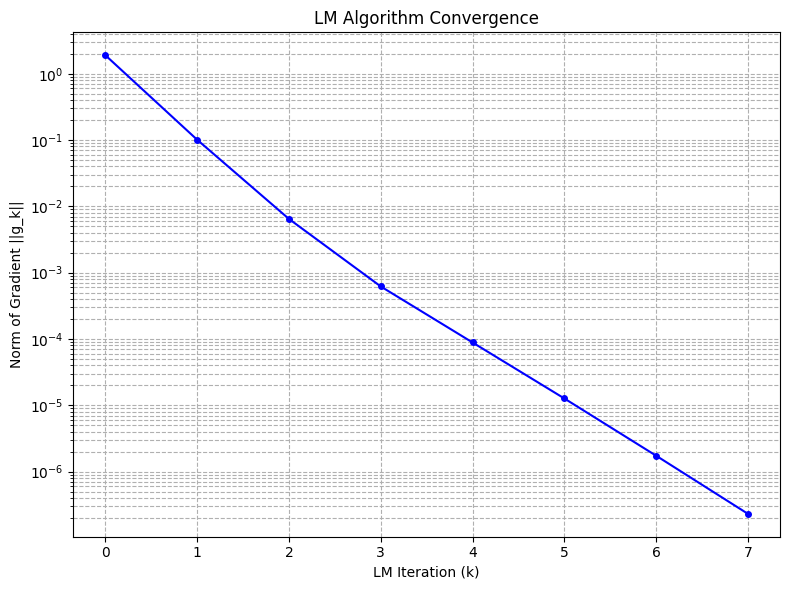

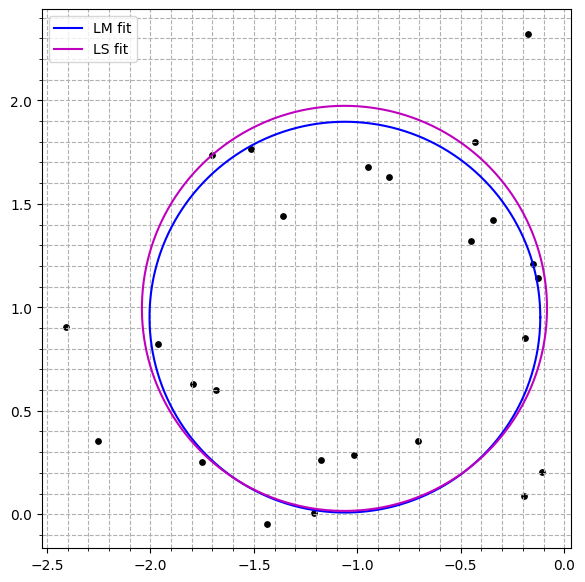

In [9]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.semilogy(range(len(gradient_norms_list)), gradient_norms_list, 'b-o', markersize=4)
ax2.set_title('LM Algorithm Convergence')
ax2.set_xlabel('LM Iteration (k)')
ax2.set_ylabel('Norm of Gradient ||g_k||')
ax2.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(circle_data_1[:, 0], circle_data_1[:, 1], c='black', s=15, label=None)

theta = np.linspace(0, 2 * np.pi, 360)
x_fit_LM1 = c_LM1[0] + R_LM1 * np.cos(theta)
y_fit_LM1 = c_LM1[1] + R_LM1 * np.sin(theta)


ax.plot(x_fit_LM1, y_fit_LM1, c='b', label='LM fit')
ax.plot(x_fit_LS1, y_fit_LS1, c='m', label='LS fit')
ax.legend()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--')
ax.minorticks_on()

plt.show()


## Task 10

stopping criterion epsilon achieved
y = 2.111 c = (-0.879, 1.104), R = 0.909


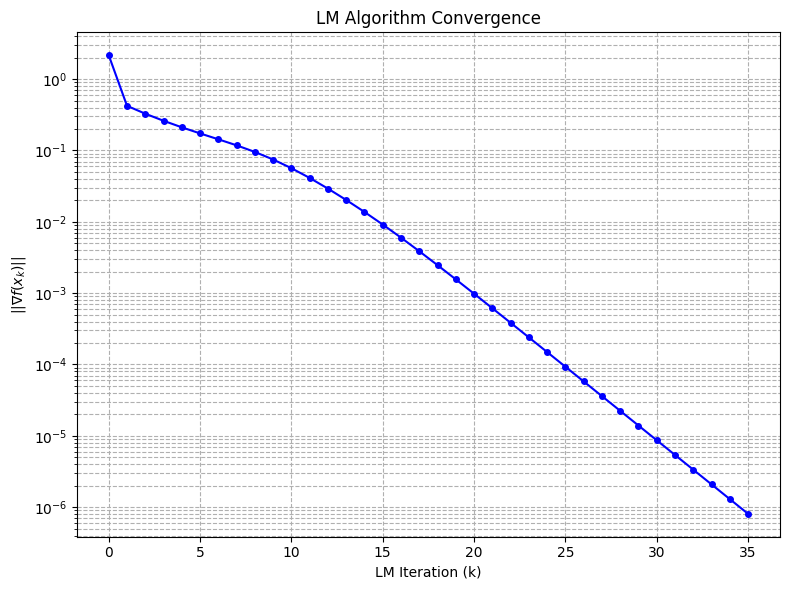

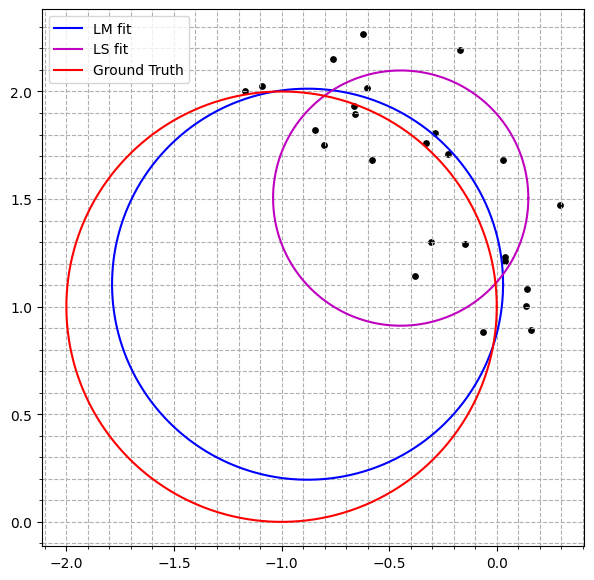

In [11]:
import numpy as np
import matplotlib.pyplot as plt

circle_data_2 = np.load("circle_data_2.npy")
circle_data_2 = np.transpose(circle_data_2)
x_sample = circle_data_2[:,0]
y_sample = circle_data_2[:,1]

# LM algorithm (for nonlinear least-squares)

from numpy.linalg import lstsq

# passo 1
# Initialize parameters based on LS approach
# C = (-1.062, 0.995), R = 0.979
x_k = np.array([c_LS2[0], c_LS2[1], R_LS2])
lambda_k = 1.0
epsilon = 1e-6
max_k_iterations = 10000

gradient_norms_list = []
# passo 2 e 3
for k in range(max_k_iterations):
    cx, cy, R = x_k
    c_k = np.array([cx, cy])

    f_xk = np.linalg.norm(circle_data_2 - c_k, axis=1) - R
    
    # calcular jacobiano de f
    J = np.zeros((f_xk.shape[0], 3))
    J[:, 0] = -(circle_data_2[:, 0] - cx) / np.linalg.norm(circle_data_2 - c_k, axis=1) # d c_x
    J[:, 1] = -(circle_data_2[:, 1] - cy) / np.linalg.norm(circle_data_2 - c_k, axis=1) # d c_y
    J[:, 2] = -1.0 # dR

    # passo 4
    g_k = 2 * J.T @ f_xk

    norm_g_k = np.linalg.norm(g_k)
    gradient_norms_list.append(norm_g_k)

    # passo 5
    if norm_g_k < epsilon:
        print("stopping criterion epsilon achieved")
        break

    # passo 6
    A = np.vstack([J, np.sqrt(lambda_k) * np.identity(3)])
    b = np.hstack([J @ x_k - f_xk, np.sqrt(lambda_k) * x_k])

    next_x_k, residuals, rank, s = lstsq(A, b, rcond=None)

    

    next_cx, next_cy, next_R = next_x_k
    next_c = np.array([next_cx, next_cy])


    f_next_xk = np.linalg.norm(circle_data_2 - next_c, axis=1) - next_R
    
    cost = np.sum(f_xk**2)
    next_cost = np.sum(f_next_xk**2)

    if next_cost < cost:
        x_k = next_x_k
        lambda_k *= 0.7
    else:
        lambda_k *= 2.0
else:
    print("maximum number of iterations achieved")
cx_LM2, cy_LM2, R_LM2 = x_k
c_LM2 = np.array([cx_LM2, cy_LM2])

print(f"y = {y_opt:.3f} c = ({c_LM2[0]:.3f}, {c_LM2[1]:.3f}), R = {R_LM2:.3f}")

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.semilogy(range(len(gradient_norms_list)), gradient_norms_list, 'b-o', markersize=4)
ax2.set_title('LM Algorithm Convergence')
ax2.set_xlabel('LM Iteration (k)')
ax2.set_ylabel('$||\\nabla f(x_k)||$')
ax2.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(circle_data_2[:, 0], circle_data_2[:, 1], c='black', s=15, label=None)

theta = np.linspace(0, 2 * np.pi, 360)
x_fit_LM2 = c_LM2[0] + R_LM2 * np.cos(theta)
y_fit_LM2 = c_LM2[1] + R_LM2 * np.sin(theta)


ax.plot(x_fit_LM2, y_fit_LM2, c='b', label='LM fit')
ax.plot(x_fit_LS2, y_fit_LS2, c='m', label='LS fit')
ax.plot(-1 + 1 * np.cos(theta), 1 + 1 * np.sin(theta), c='r', label='Ground Truth')

ax.legend()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--')
ax.minorticks_on()

plt.show()